In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [22]:
# Create a reference the CSV file desired
adverse_path = "./Resources/VAERSDATA1 (3).csv"

# Read the CSV into a Pandas DataFrame
adverse = pd.read_csv(adverse_path, low_memory=False)

# Print the first five rows of data to the screen
adverse.head()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,8.0,SEN,MODERNA,NaN,Nka
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,0.0,PUB,MODERNA,NaN,NaN
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,sulfa based products
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,14.0,PUB,PFIZER\BIONTECH,NaN,NaN
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN


In [23]:
# Checking the number of mice.
len(adverse["VAERS_ID"].unique())

896529

In [24]:
# Count occurrences of each gender in the "SEX" column
gender_counts = adverse["SEX"].value_counts()

# Extract counts for male and female
male_count = gender_counts.get("M", 0)  # Default to 0 if "M" is not present
female_count = gender_counts.get("F", 0)  # Default to 0 if "F" is not present
unknown_count = gender_counts.get("U", 0)  # Default to 0 if "F" is not present

# Display results
male_count, female_count, unknown_count

(295275, 591719, 9535)

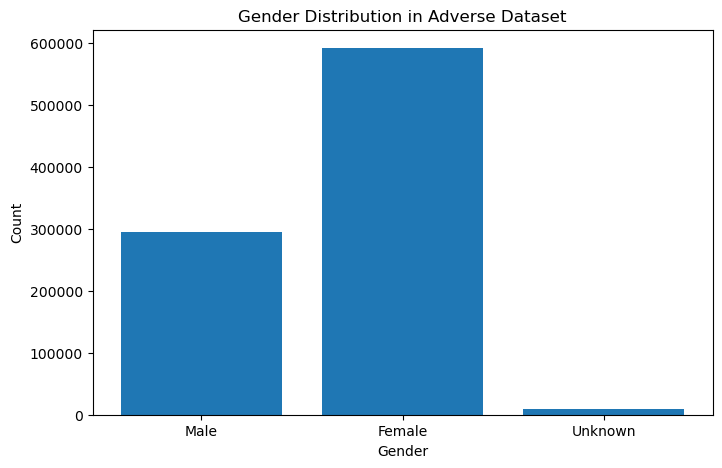

In [25]:
# Define labels and values for the bar chart
labels = ["Male", "Female", "Unknown"]
values = [male_count, female_count, unknown_count]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)

# Add title and labels
plt.title("Gender Distribution in Adverse Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")

# Save the figure
plt.savefig("gender_distribution.png", format='png', dpi=300)  # Save as PNG

# Show the chart
plt.show()

In [26]:
# Count the number of deaths by gender
death_counts = adverse[adverse["DIED"] == "Y"]["SEX"].value_counts()

# Extract counts for male, female, and unknown
male_death_count = death_counts.get("M", 0)
female_death_count = death_counts.get("F", 0)
unknown_death_count = death_counts.get("U", 0)

# Calculate death rates for each gender
male_death_rate = (male_death_count / male_count) * 100 if male_count > 0 else 0
female_death_rate = (female_death_count / female_count) * 100 if female_count > 0 else 0
unknown_death_rate = (unknown_death_count / unknown_count) * 100 if unknown_count > 0 else 0

# Display results
male_death_rate, female_death_rate, unknown_death_rate

(3.3765134196935063, 1.1544331008468547, 1.101206082852648)

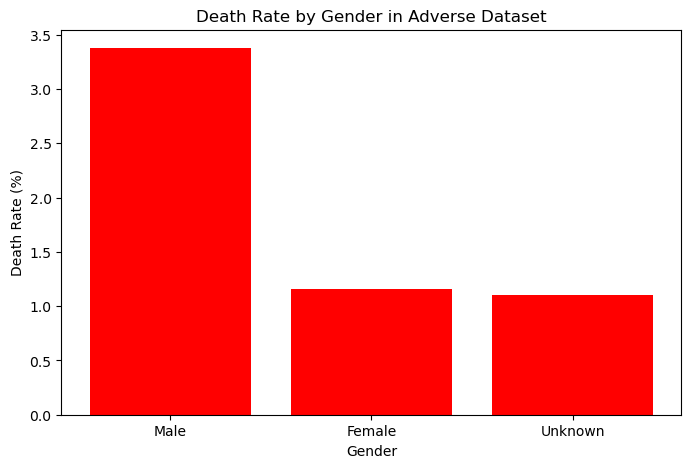

In [27]:
# Define labels and values for the death rate bar chart
labels = ["Male", "Female", "Unknown"]
death_rates = [male_death_rate, female_death_rate, unknown_death_rate]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, death_rates, color='red')

# Add title and labels
plt.title("Death Rate by Gender in Adverse Dataset")
plt.xlabel("Gender")
plt.ylabel("Death Rate (%)")

# Save the figure
plt.savefig("gender_death_rate.png", format='png', dpi=300)  # Save as PNG

# Show the chart
plt.show()
